# Exam 1- Higgs ML Challenge

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

We will run a mini-competition, using the same data, as your first exam. Note that you will not need a Kaggle account, but may wish to get one to get more details.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

    - Convert CSV to h5 format.
    - Load data and plot/compare variables.
    - Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )
    - Evaluate and compare different classifiers using ROC curves and metric defined by competition.

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML


In [40]:
!ls /data/afarbin/DLClass/HiggsML

Exam 1.ipynb  test.csv	training.csv


Note that the first line of the file contains the variable names:

In [41]:
!head -2 /data/afarbin/DLClass/HiggsML/training.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s


Some basic shell commands may help you. For example here is the number of lines (so N Events + variable names):

In [42]:
!wc -l /data/afarbin/DLClass/HiggsML/training.csv

250001 /data/afarbin/DLClass/HiggsML/training.csv


You can strip off the first line into a new file in your Exam directory:

In [43]:
!tail -250000 /data/afarbin/DLClass/HiggsML/training.csv > mytraining.csv

In [44]:
!head -2 mytraining.csv

100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
100001,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b


In [45]:
filename="./mytraining.csv"

In [46]:
VarNames="EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label".split(",")
RawNames="DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality".split(",")
FeatureNames="PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt".split(",")

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [64]:
df = pd.read_csv(filename, dtype='str', names=VarNames)
df.Label = np.where(df["Label"]=="s", 1, 0)
df_eventID=df[VarNames[0]]
df_Weight=df[VarNames[-2]]
df_Label=df[VarNames[-1]]
df=df[VarNames[1:-2]]
df=df.astype("float64")
df=(df-df.min())/(df.max()-df.min())
df.insert(0, "EventId", df_eventID)
df["Weight"]=df_Weight
df["Label"]=df_Label
df_sig=df[df.Label==1]
df_bkg=df[df.Label==0]
N_S=df_sig.Weight.astype("float64").sum()
N_B=df_bkg.Weight.astype("float64").sum()
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,0.519149,0.074854,0.068128,0.009869,0.992464,0.188101,0.986193,0.521549,0.014789,...,0.666667,0.503137,0.997659,0.997309,0.607433,0.996751,0.994395,0.069484,0.00265331133733,1
1,100001,0.529404,0.099653,0.072155,0.016983,0.000000,0.000000,0.000000,0.596238,0.000733,...,0.333333,0.493130,0.996239,0.998021,0.000000,0.000000,0.000000,0.028300,2.23358448717,0
2,100002,0.000000,0.235006,0.089071,0.012570,0.000000,0.000000,0.000000,0.536888,0.003293,...,0.333333,0.492199,0.997563,0.994842,0.000000,0.000000,0.000000,0.027091,2.34738894364,0
3,100003,0.521630,0.117983,0.055557,0.000146,0.000000,0.000000,0.000000,0.566472,0.000146,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.44637821192,0
4,100004,0.536216,0.024512,0.095662,0.005787,0.000000,0.000000,0.000000,0.672571,0.005787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.24533268686,0
5,100005,0.496911,0.019636,0.039329,0.041038,0.994177,0.214862,0.983036,0.210738,0.021735,...,1.000000,0.514041,0.993113,0.996214,0.613305,0.995739,0.999964,0.118560,0.0834140312717,0
6,100006,0.523843,0.041824,0.075541,0.037436,0.992288,0.193733,0.983679,0.499087,0.000898,...,0.666667,0.529357,0.996378,0.998313,0.613713,0.995646,0.994104,0.110122,0.00265331133733,1
7,100007,0.526656,0.015097,0.065811,0.010289,0.000000,0.000000,0.000000,0.491052,0.000538,...,0.333333,0.485776,0.994804,0.995145,0.000000,0.000000,0.000000,0.018757,0.018636116672,1
8,100008,0.504145,0.073266,0.070483,0.001513,0.000000,0.000000,0.000000,0.492330,0.001513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.29600298518,0
9,100009,0.514395,0.128886,0.046867,0.068216,0.000000,0.000000,0.000000,0.255844,0.010180,...,0.333333,0.550458,0.992759,0.994357,0.000000,0.000000,0.000000,0.102689,0.00150187015894,1


DER_mass_MMC


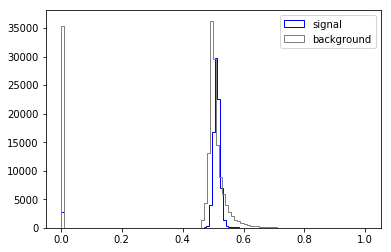

DER_mass_transverse_met_lep


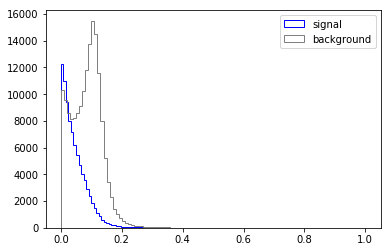

DER_mass_vis


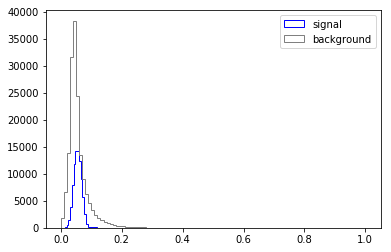

DER_pt_h


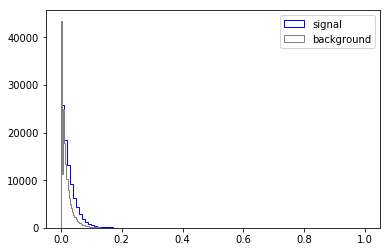

DER_deltaeta_jet_jet


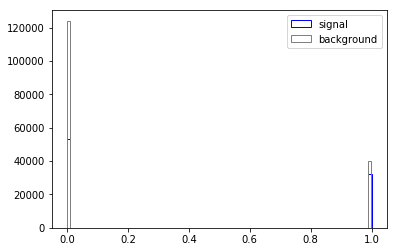

DER_mass_jet_jet


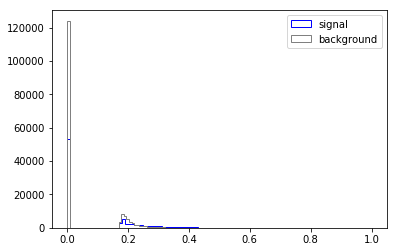

DER_prodeta_jet_jet


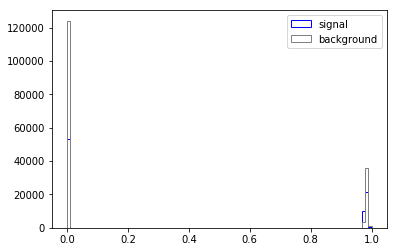

DER_deltar_tau_lep


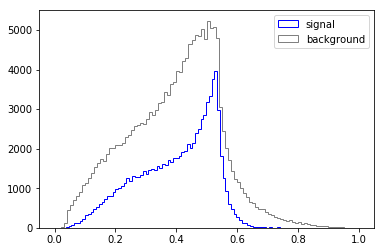

DER_pt_tot


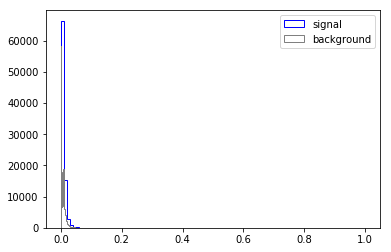

DER_sum_pt


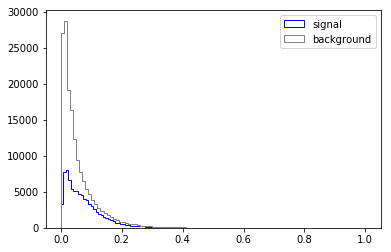

DER_pt_ratio_lep_tau


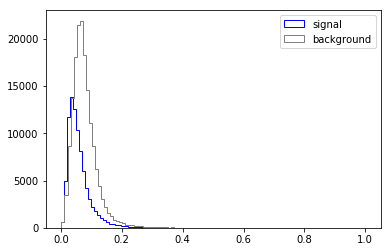

DER_met_phi_centrality


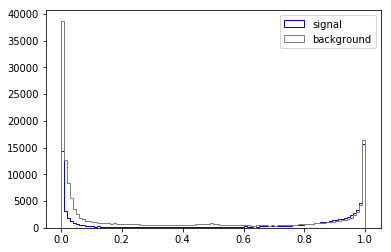

DER_lep_eta_centrality


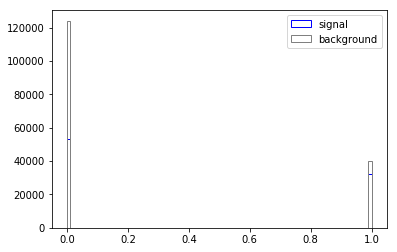

PRI_tau_pt


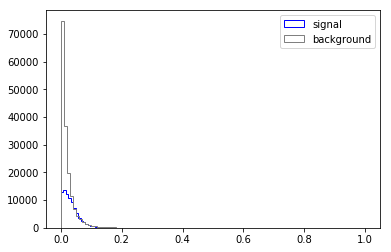

PRI_tau_eta


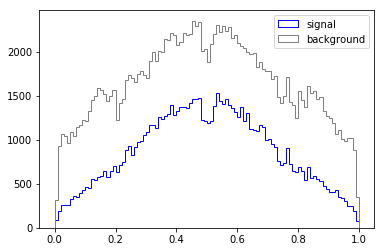

PRI_tau_phi


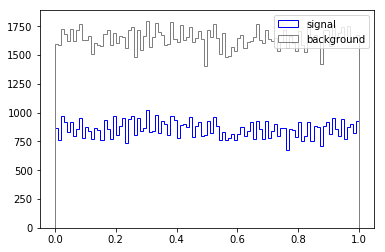

PRI_lep_pt


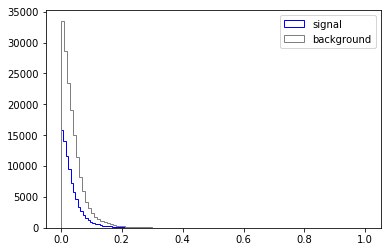

PRI_lep_eta


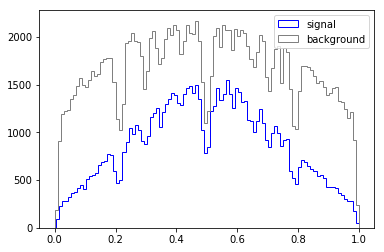

PRI_lep_phi


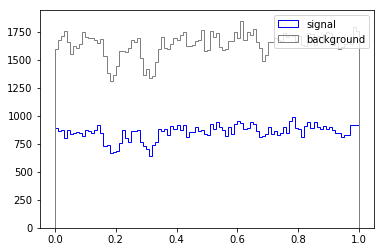

PRI_met


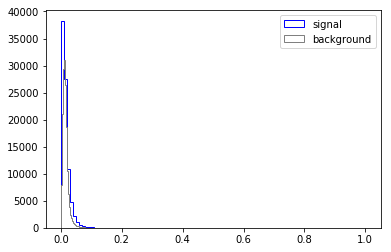

PRI_met_phi


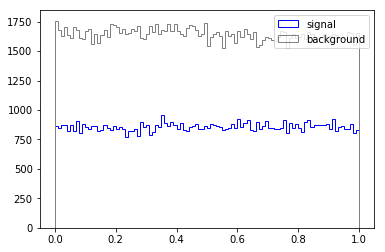

PRI_met_sumet


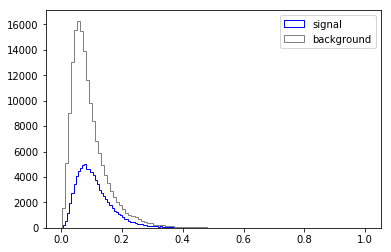

PRI_jet_num


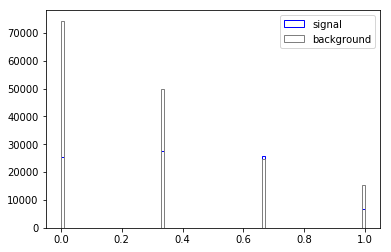

PRI_jet_leading_pt


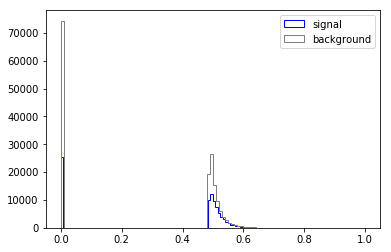

PRI_jet_leading_eta


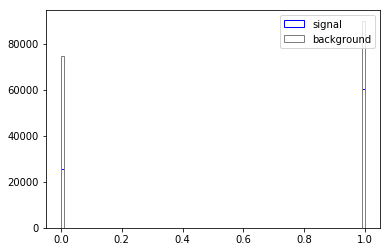

PRI_jet_leading_phi


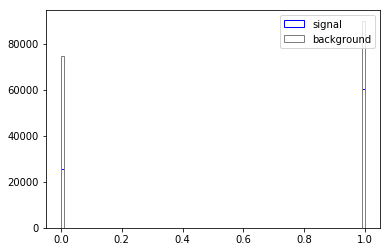

PRI_jet_subleading_pt


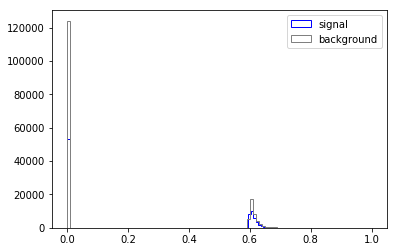

PRI_jet_subleading_eta


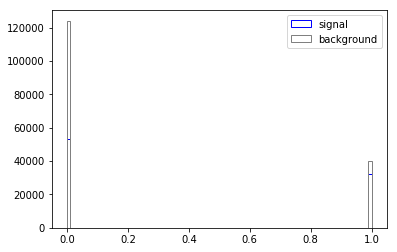

PRI_jet_subleading_phi


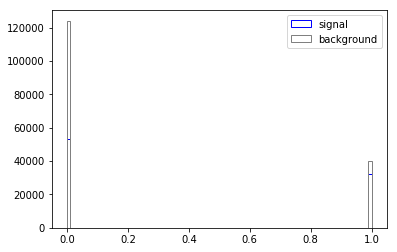

PRI_jet_all_pt


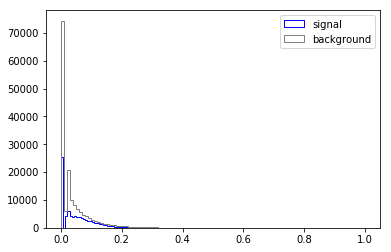

Weight


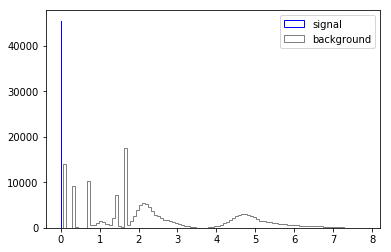

In [49]:
for var in VarNames[1:-1]:
    print var
    plt.figure()
    plt.hist(df_sig[var].astype("float64"),bins=100,histtype="step", color="blue",label="signal",stacked=True)
    plt.hist(df_bkg[var].astype("float64"),bins=100,histtype="step", color="gray", label="background",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

In [50]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [51]:
N_Train=200000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["Label"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["Label"]

Test_sig=Test_Sample[Test_Sample.Label!=0]
Test_bkg=Test_Sample[Test_Sample.Label==0]


In [52]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

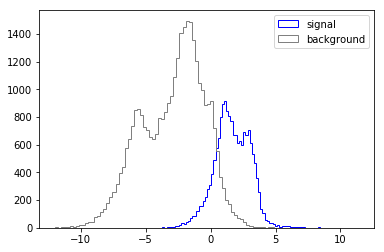

In [53]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="gray", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

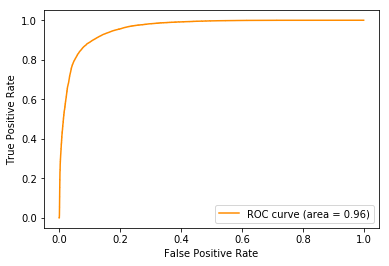

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

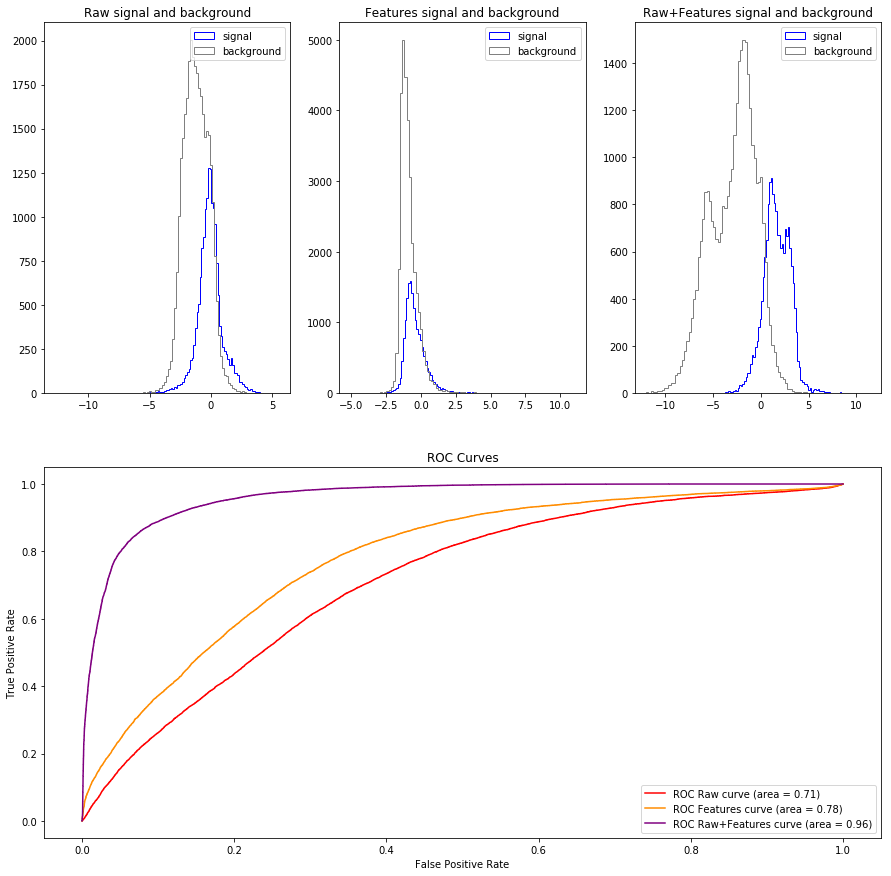

In [55]:
rawTrain=Train_Sample[RawNames]
rawYTrain=Train_Sample["Label"]
rawTest=Test_Sample[RawNames]
rawYTest=Test_Sample["Label"]

Fisher.fit(rawTrain, rawYTrain)

plt.figure("Signal to Background", [15,15])
plt.subplot(2, 3, 1)
plt.title("Raw signal and background")
plt.hist(Fisher.decision_function(Test_sig[RawNames]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[RawNames]),bins=100,histtype="step", color="gray", label="background",stacked=True)
plt.legend(loc='upper right')

fprRaw, tprRaw, _ = roc_curve(rawYTest, Fisher.decision_function(rawTest))

roc_auc_raw = auc(fprRaw, tprRaw)

featuresTrain = Train_Sample[FeatureNames]
featuresYTrain = Train_Sample["Label"]
featuresTest = Test_Sample[FeatureNames]
featuresYTest = Test_Sample["Label"]

Fisher.fit(featuresTrain, featuresYTrain)

plt.subplot(2, 3, 2)
plt.title("Features signal and background")
plt.hist(Fisher.decision_function(Test_sig[FeatureNames]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[FeatureNames]),bins=100,histtype="step", color="gray", label="background",stacked=True)
plt.legend(loc='upper right')

fprFeatures, tprFeatures, _ = roc_curve(featuresYTest, Fisher.decision_function(featuresTest))

roc_auc_features = auc(fprFeatures, tprFeatures)

totalTrain = Train_Sample[VarNames[1:]]
totalYTrain = Train_Sample["Label"]
totalTest = Test_Sample[VarNames[1:]]
totalYTest = Test_Sample["Label"]

Fisher.fit(totalTrain, totalYTrain)

plt.subplot(2, 3, 3)
plt.title("Raw+Features signal and background")
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="gray", label="background",stacked=True)
plt.legend(loc='upper right')

fprTotal, tprTotal, _ = roc_curve(totalYTest, Fisher.decision_function(totalTest))

roc_auc_total = auc(fprTotal, tprTotal)

plt.subplot(2, 1, 2)
plt.title("ROC Curves")
plt.plot(fprFeatures,tprFeatures,color='red',label='ROC Raw curve (area = %0.2f)' % roc_auc_features)
plt.plot(fprRaw,tprRaw,color='darkorange',label='ROC Features curve (area = %0.2f)' % roc_auc_raw)
plt.plot(fprTotal,tprTotal,color='purple',label='ROC Raw+Features curve (area = %0.2f)' % roc_auc_total)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

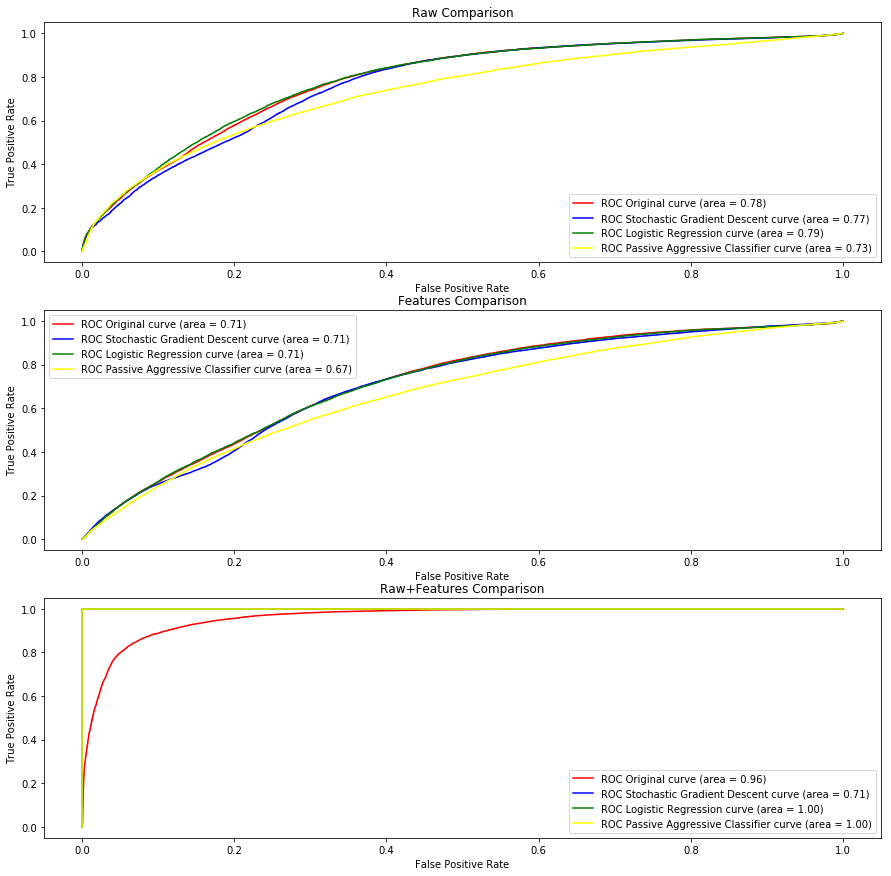

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
#Raw Input
#*****************************************************************#
rawTrain=Train_Sample[RawNames]
rawYTrain=Train_Sample["Label"]
rawTest=Test_Sample[RawNames]
rawYTest=Test_Sample["Label"]

Fisher.fit(rawTrain, rawYTrain)
fprRaw, tprRaw, _ = roc_curve(rawYTest, Fisher.decision_function(rawTest))
roc_auc_raw = auc(fprRaw, tprRaw)

clf = SGDClassifier(shuffle=True)
clf.fit(rawTrain, rawYTrain)
fprSGDRaw, tprSGDRaw, _ = roc_curve(rawYTest, clf.decision_function(rawTest))
roc_auc_sgd_raw = auc(fprSGDRaw, tprSGDRaw)

lgRegression = LogisticRegression()
lgRegression.fit(rawTrain, rawYTrain)
fprLGRaw, tprLGRaw, _ = roc_curve(rawYTest, lgRegression.decision_function(rawTest))
roc_auc_lgr_raw = auc(fprLGRaw, tprLGRaw)

pac = PassiveAggressiveClassifier()
pac.fit(rawTrain, rawYTrain)
fprPacRaw, tprPacRaw, _ = roc_curve(rawYTest, pac.decision_function(rawTest))
roc_auc_pac_raw = auc(fprPacRaw, tprPacRaw)
#*****************************************************************#

#Features Input
#*****************************************************************#
featuresTrain=Train_Sample[FeatureNames]
featuresYTrain=Train_Sample["Label"]
featuresTest=Test_Sample[FeatureNames]
featuresYTest=Test_Sample["Label"]

Fisher.fit(featuresTrain, featuresYTrain)
fprFeatures, tprFeatures, _ = roc_curve(featuresYTest, Fisher.decision_function(featuresTest))
roc_auc_features = auc(fprFeatures, tprFeatures)

clf = SGDClassifier(shuffle=True)
clf.fit(featuresTrain, featuresYTrain)
fprSGDFeatures, tprSGDFeatures, _ = roc_curve(featuresYTest, clf.decision_function(featuresTest))
roc_auc_sgd_features = auc(fprSGDFeatures, tprSGDFeatures)

lgRegression = LogisticRegression()
lgRegression.fit(featuresTrain, featuresYTrain)
fprLGFeatures, tprLGFeatures, _ = roc_curve(featuresYTest, lgRegression.decision_function(featuresTest))
roc_auc_lgr_features = auc(fprLGFeatures, tprLGFeatures)

pac = PassiveAggressiveClassifier()
pac.fit(featuresTrain, featuresYTrain)
fprPacFeatures, tprPacFeatures, _ = roc_curve(featuresYTest, pac.decision_function(featuresTest))
roc_auc_pac_features = auc(fprPacFeatures, tprPacFeatures)
#*****************************************************************#

#Raw+Features Inputs
#*****************************************************************#
totalTrain=Train_Sample[VarNames[1:]]
totalYTrain=Train_Sample["Label"]
totalTest=Test_Sample[VarNames[1:]]
totalYTest=Test_Sample["Label"]

Fisher.fit(totalTrain, totalYTrain)
fprTotal, tprTotal, _ = roc_curve(totalYTest, Fisher.decision_function(totalTest))
roc_auc_total = auc(fprTotal, tprTotal)

clf = SGDClassifier(shuffle=True)
clf.fit(totalTrain, totalYTrain)
fprSGDTotal, tprSGDTotal, _ = roc_curve(totalYTest, clf.decision_function(totalTest))
roc_auc_sgd_total = auc(fprSGDFeatures, tprSGDFeatures)

lgRegression = LogisticRegression()
lgRegression.fit(totalTrain, totalYTrain)
fprLGTotal, tprLGTotal, _ = roc_curve(totalYTest, lgRegression.decision_function(totalTest))
roc_auc_lgr_total = auc(fprLGTotal, tprLGTotal)

pac = PassiveAggressiveClassifier()
pac.fit(totalTrain, totalYTrain)
fprPacTotal, tprPacTotal, _ = roc_curve(totalYTest, pac.decision_function(totalTest))
roc_auc_pac_total = auc(fprPacTotal, tprPacTotal)
#*****************************************************************#
plt.figure("Comparing Different Classifiers", [15,15])

plt.subplot(3, 1, 1)
plt.title("Raw Comparison")
plt.plot(fprRaw,tprRaw,color='red',label='ROC Original curve (area = %0.2f)' % roc_auc_raw)
plt.plot(fprSGDRaw,tprSGDRaw,color="blue", label="ROC Stochastic Gradient Descent curve (area = %0.2f)" % roc_auc_sgd_raw)
plt.plot(fprLGRaw, tprLGRaw, color="green", label="ROC Logistic Regression curve (area = %0.2f)" % roc_auc_lgr_raw)
plt.plot(fprPacRaw, tprPacRaw, color="yellow", label="ROC Passive Aggressive Classifier curve (area = %0.2f)" % roc_auc_pac_raw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(3, 1, 2)
plt.title("Features Comparison")
plt.plot(fprFeatures,tprFeatures,color='red',label='ROC Original curve (area = %0.2f)' % roc_auc_features)
plt.plot(fprSGDFeatures,tprSGDFeatures,color="blue", label="ROC Stochastic Gradient Descent curve (area = %0.2f)" % roc_auc_sgd_features)
plt.plot(fprLGFeatures, tprLGFeatures, color="green", label="ROC Logistic Regression curve (area = %0.2f)" % roc_auc_lgr_features)
plt.plot(fprPacFeatures, tprPacFeatures, color="yellow", label="ROC Passive Aggressive Classifier curve (area = %0.2f)" % roc_auc_pac_features)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(3, 1, 3)
plt.title("Raw+Features Comparison")
plt.plot(fprTotal,tprTotal,color='red',label='ROC Original curve (area = %0.2f)' % roc_auc_total)
plt.plot(fprSGDTotal,tprSGDTotal,color="blue", label="ROC Stochastic Gradient Descent curve (area = %0.2f)" % roc_auc_sgd_total)
plt.plot(fprLGTotal, tprLGTotal, color="green", label="ROC Logistic Regression curve (area = %0.2f)" % roc_auc_lgr_total)
plt.plot(fprPacTotal, tprPacTotal, color="yellow", label="ROC Passive Aggressive Classifier curve (area = %0.2f)" % roc_auc_pac_total)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

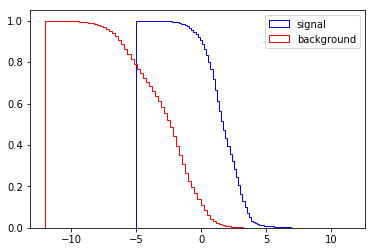

73


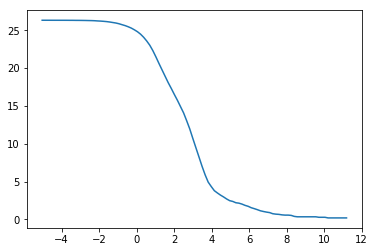

Max significance at  -5.03230654206  of 26.3277991364


(-5.0323065420597182, 26.327799136433427, 0)

In [57]:
import numpy as np

def PlotSignificance(N_S,N_B, N_S_min=1, breg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)
    
    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    s=N_S*eff_sig
    b=N_B*eff_bkg
    significance=np.sqrt(2*((s+b+breg)*np.log(1+(s/(b+breg)))) - s)

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(N_S,N_B)

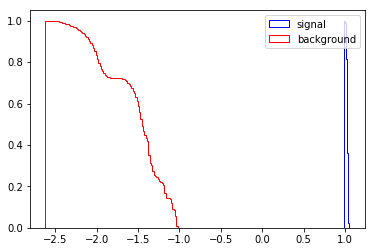

89


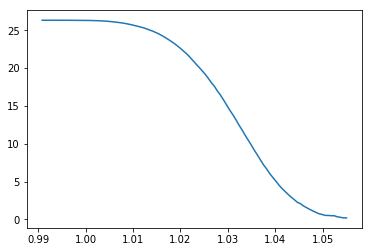

Max significance at  0.990850722128  of 26.3277991364


(0.99085072212784242, 26.327799136433434, 0)

In [58]:
def PlotSignificance(N_S,N_B, N_S_min=1, breg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(clf.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(clf.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)
    
    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    s=N_S*eff_sig
    b=N_B*eff_bkg
    significance=np.sqrt(2*((s+b+breg)*np.log(1+(s/(b+breg)))) - s)

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(N_S,N_B)

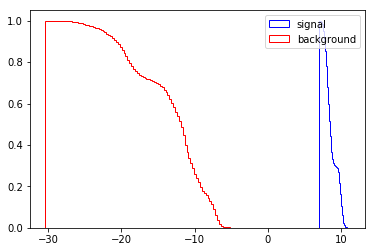

91


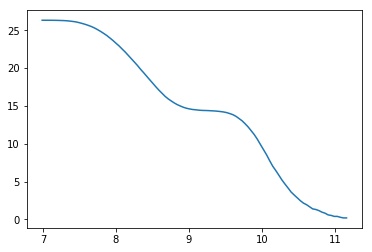

Max significance at  6.98855824067  of 26.3277991364


(6.9885582406674907, 26.327799136433431, 0)

In [59]:
def PlotSignificance(N_S,N_B, N_S_min=1, breg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(lgRegression.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(lgRegression.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)
    
    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    s=N_S*eff_sig
    b=N_B*eff_bkg
    significance=np.sqrt(2*((s+b+breg)*np.log(1+(s/(b+breg)))) - s)

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(N_S,N_B)

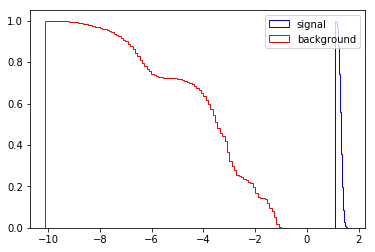

81


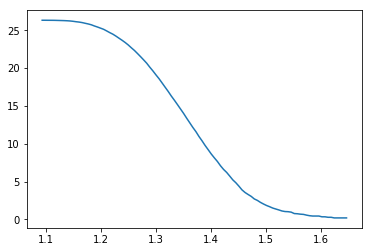

Max significance at  1.09254594554  of 26.3277991364


(1.0925459455438467, 26.327799136433431, 0)

In [60]:
def PlotSignificance(N_S,N_B, N_S_min=1, breg=10):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(pac.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(pac.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)
    
    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    s=N_S*eff_sig
    b=N_B*eff_bkg
    significance=np.sqrt(2*((s+b+breg)*np.log(1+(s/(b+breg)))) - s)

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(N_S,N_B)